In [1]:
import os
ROOT_DIR = "/home/nrr/projects/inundation-emulator"
os.chdir(ROOT_DIR)

In [2]:
from src.emulator import Emulator, DataReader
import tensorflow as tf
import matplotlib.pyplot as plt
from netCDF4 import Dataset

2025-06-04 07:59:14.260056: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-04 07:59:14.267354: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-04 07:59:14.337640: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-04 07:59:14.405939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749023954.472560 1757157 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749023954.49

In [3]:
# Load pretrained emulator.

GENERATED_DIR = "/home/nrr/projects/inundation-emulator/generated"
TOPO_FILE = '/home/ebr/data/PTHA2020_runs_UMA/Catania/C_CT.grd'
TOPO_MASK = '/home/ebr/data/PTHA2020_runs_UMA/Catania/ct_mask.txt'
TRAIN_SCENARIOS = "/home/nrr/projects/inundation-emulator/scenario.txt"
TRAIN_DIR = '/home/nrr/NGI/P/2022/02/20220296/Calculations/temp_emulator'
VALIDATION_SCENARIOS = '/home/ebr/data/PTHA2020_runs_UMA/test/scenarios.txt'
VALIDATION_DIR = "/home/ebr/data/PTHA2020_runs_UMA/test"
TEST_SCENARIOS = '/home/nrr/projects/inundation-emulator/tests/data/scenarios.txt' #1 event
TEST_DIR = "/home/nrr/projects/inundation-emulator/tests/data"

RUNDIR = "/home/nrr/projects/inundation-emulator/generated/emulator_20250406_124935"
EPOCH_CHECKPOINT = 300

emulator = Emulator(GENERATED_DIR, RUNDIR)

W0000 00:00:1749023957.467742 1757157 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-06-04 07:59:18,556 - src.emulator - INFO - Encoder:


2025-06-04 07:59:18,570 - src.emulator - INFO - Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 15, 481, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 13, 479, 8)     │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 13, 479, 8)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 239, 8)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 235, 16)     │         1,920 │
├───────

2025-06-04 07:59:18,578 - src.emulator - INFO - Model: "sequential_1"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 418908)         │    27,229,020 │
├─────

In [4]:
emulator.topomask.shape

(2224, 912)

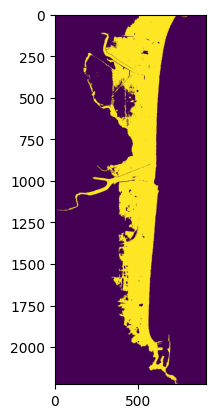

In [5]:
plt.imshow(emulator.topomask)

In [36]:

from pprint import pprint

def inspect_nc_file(file_path):
    # Open the NetCDF file
    dataset = Dataset(file_path, 'r')
    
    # Print general information about the dataset
    print(f"File: {file_path}")
    print(f"Dimensions:")
    pprint(dataset.dimensions)
    
    print(f"\nVariables:")
    pprint(dataset.variables)
    
    print(f"\nGlobal Attributes:")
    pprint(dataset.ncattrs())
    for attr in dataset.ncattrs():
        print(f"{attr}: {getattr(dataset, attr)}")
    
    # Close the dataset
    dataset.close()

inspect_nc_file("/home/nrr/projects/inundation-emulator/generated/predictions/emulator_20250516_073408/preds_20250516_142559/PS_Scenario000001_CT_10m_PR.nc")


File: /home/nrr/projects/inundation-emulator/generated/predictions/emulator_20250516_073408/preds_20250516_142559/PS_Scenario000001_CT_10m_PR.nc
Dimensions:
{'grid_lat': "<class 'netCDF4.Dimension'>": name = 'grid_lat', size = 2224,
 'grid_lon': "<class 'netCDF4.Dimension'>": name = 'grid_lon', size = 912,
 'lat': "<class 'netCDF4.Dimension'>": name = 'lat', size = 2224,
 'lon': "<class 'netCDF4.Dimension'>": name = 'lon', size = 912,
 'time': "<class 'netCDF4.Dimension'>": name = 'time', size = 2}

Variables:
{'grid_lat': <class 'netCDF4.Variable'>
float64 grid_lat(grid_lat)
    long_name: Grid latitude
    units: degrees
unlimited dimensions: 
current shape = (2224,)
filling on, default _FillValue of 9.969209968386869e+36 used,
 'grid_lon': <class 'netCDF4.Variable'>
float64 grid_lon(grid_lon)
    long_name: Grid longitude
    units: degrees
unlimited dimensions: 
current shape = (912,)
filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4.Variable'>
f

Model used for 6.4 deliverable

In [6]:
# Example usage
PREDICTION_DIR = "/home/nrr/projects/inundation-emulator/generated/predictions/emulator_20250406_124935"
file_path_pred = os.path.join(PREDICTION_DIR, "preds_20250508_125232", "PS_Scenario000001_CT_10m_PR.nc")
file_path_true = "/home/nrr/projects/inundation-emulator/tests/data/PS_Scenario000001_CT_10m.nc"
# inspect_nc_file(file_path_pred)
# inspect_nc_file(file_path_true)

File: /home/nrr/projects/inundation-emulator/tests/data/PS_Scenario000001_CT_10m.nc
Dimensions:
{'lat': "<class 'netCDF4.Dimension'>": name = 'lat', size = 2224,
 'lon': "<class 'netCDF4.Dimension'>": name = 'lon', size = 912}

Variables:
{'lat': <class 'netCDF4.Variable'>
float64 lat(lat)
    _FillValue: nan
unlimited dimensions: 
current shape = (2224,)
filling on,
 'lon': <class 'netCDF4.Variable'>
float64 lon(lon)
    _FillValue: nan
unlimited dimensions: 
current shape = (912,)
filling on,
 'z': <class 'netCDF4.Variable'>
float32 z(lat, lon)
    _FillValue: nan
unlimited dimensions: 
current shape = (2224, 912)
filling on}

Global Attributes:
[]


Before Updating Loss function(Uses MSE Loss):



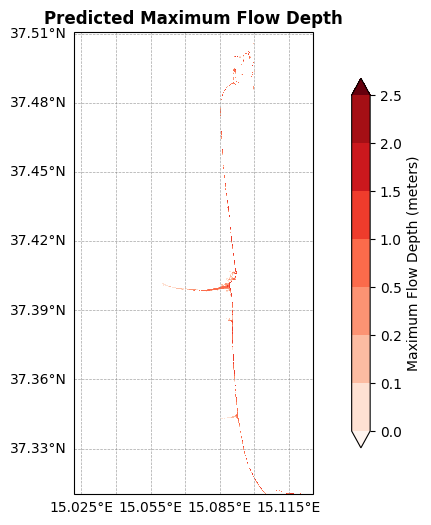

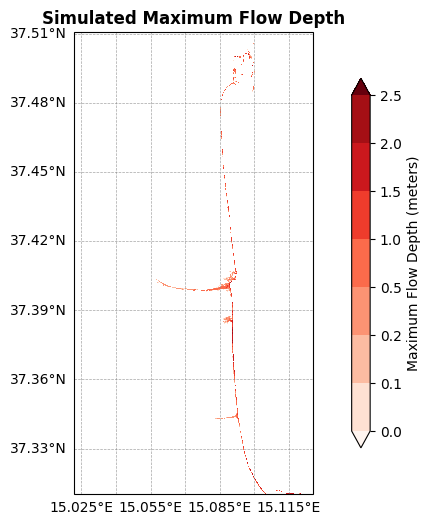

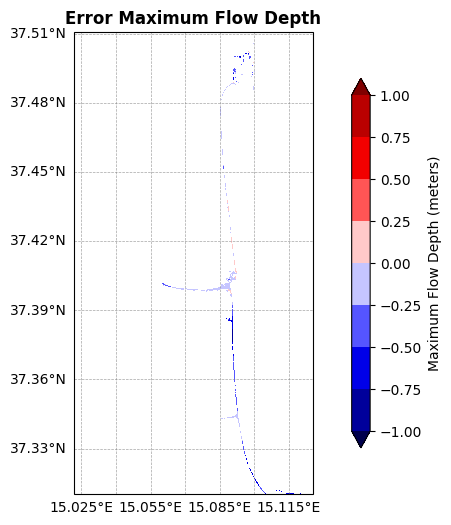

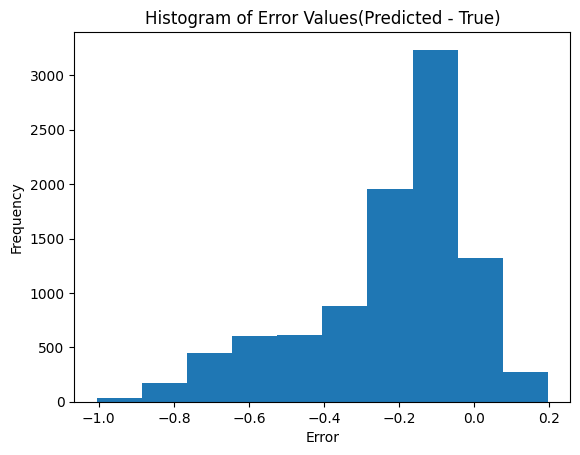

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from matplotlib import colors
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

##############PREDICTED######################

# Load the netCDF file
#file_path = "your_file.nc"  # Change to your actual file path
dataset = nc.Dataset(file_path_pred)

# Extract variables
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
predicted = dataset.variables['predicted'][:]

#set 0 to nan 
predicted = np.where(predicted <= 0, np.nan, predicted)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot predicted values as a heatmap
cmap = cm.get_cmap('Reds')
bounds = [0, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, predicted, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Predicted Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()


##################TRUE######################
# Load the netCDF file
#file_path = "your_file.nc"  # Change to your actual file path
dataset = nc.Dataset(file_path_true)

# Extract variables
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
true = dataset.variables['z'][:]

#set 0 to nan 
true = np.where(true <= 0, np.nan, true)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot true values as a heatmap
cmap = cm.get_cmap('Reds')
bounds = [0, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, true, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Simulated Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()

###################ERROR######################

error = predicted - true

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot error values as a heatmap
cmap = cm.get_cmap('seismic')
# bounds = [ -1.5,-1, -0.5, -0.25,0,0.25, 0.5, 1, 1.5]
bounds = [-1,-0.75, -0.5, -.25, 0, .25, .5, .75,1]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, error, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Error Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()

#set nan to 0 in error
error_flat = error.flatten()
error_non_nan = error_flat[~np.isnan(error_flat)]
plt.hist(error_non_nan, bins=10)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Histogram of Error Values(Predicted - True)")
plt.show()

Old Model With MSE Loss Function

In [18]:
# Example usage
PREDICTION_DIR = "/home/nrr/projects/inundation-emulator/generated/predictions/emulator_20250515_161707"
file_path_pred = os.path.join(PREDICTION_DIR, "preds_20250516_072108", "PS_Scenario000001_CT_10m_PR.nc")
file_path_true = "/home/nrr/projects/inundation-emulator/tests/data/PS_Scenario000001_CT_10m.nc"
# inspect_nc_file(file_path_pred)
# inspect_nc_file(file_path_true)

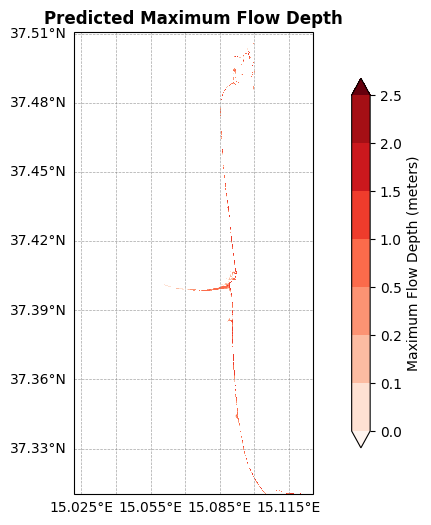

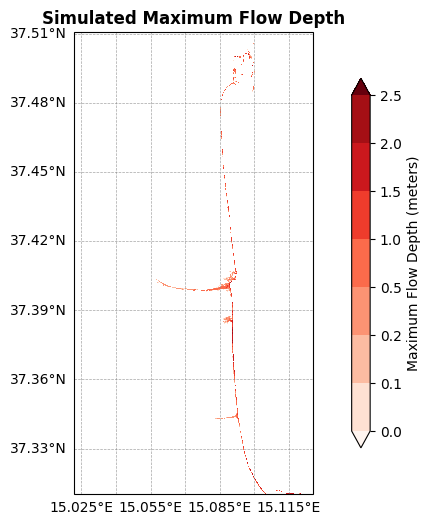

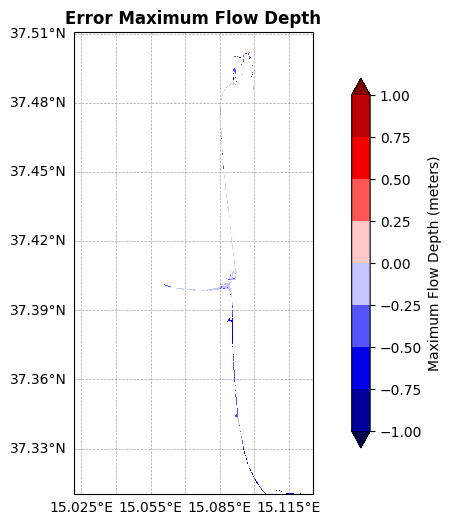

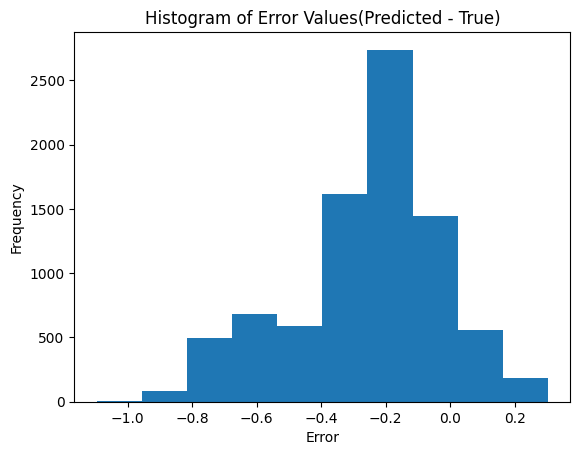

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from matplotlib import colors
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

##############PREDICTED######################

# Load the netCDF file
#file_path = "your_file.nc"  # Change to your actual file path
dataset = nc.Dataset(file_path_pred)

# Extract variables
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
predicted = dataset.variables['predicted'][:]

#set 0 to nan 
predicted = np.where(predicted <= 0, np.nan, predicted)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot predicted values as a heatmap
cmap = cm.get_cmap('Reds')
bounds = [0, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, predicted, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Predicted Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()


##################TRUE######################
# Load the netCDF file
#file_path = "your_file.nc"  # Change to your actual file path
dataset = nc.Dataset(file_path_true)

# Extract variables
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
true = dataset.variables['z'][:]

#set 0 to nan 
true = np.where(true <= 0, np.nan, true)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot true values as a heatmap
cmap = cm.get_cmap('Reds')
bounds = [0, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, true, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Simulated Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()

###################ERROR######################

error = predicted - true

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot error values as a heatmap
cmap = cm.get_cmap('seismic')
# bounds = [ -1.5,-1, -0.5, -0.25,0,0.25, 0.5, 1, 1.5]
bounds = [-1,-0.75, -0.5, -.25, 0, .25, .5, .75,1]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, error, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Error Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()

#set nan to 0 in error
error_flat = error.flatten()
error_non_nan = error_flat[~np.isnan(error_flat)]
plt.hist(error_non_nan, bins=10)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Histogram of Error Values(Predicted - True)")
plt.show()

New Assy Loss Function 

In [22]:
# Example usage
PREDICTION_DIR = "/home/nrr/projects/inundation-emulator/generated/predictions/emulator_20250516_073408"
file_path_pred = os.path.join(PREDICTION_DIR, "preds_20250516_115354", "PS_Scenario000001_CT_10m_PR.nc")
file_path_true = "/home/nrr/projects/inundation-emulator/tests/data/PS_Scenario000001_CT_10m.nc"
# inspect_nc_file(file_path_pred)
# inspect_nc_file(file_path_true)

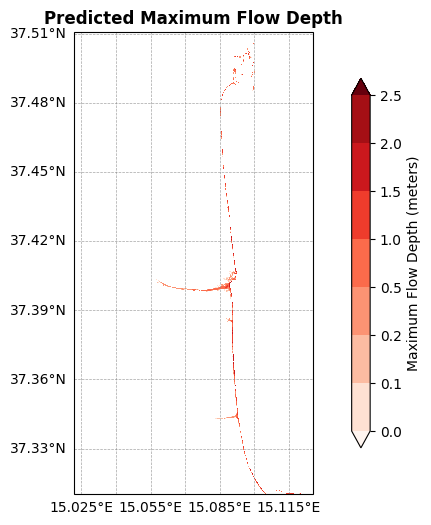

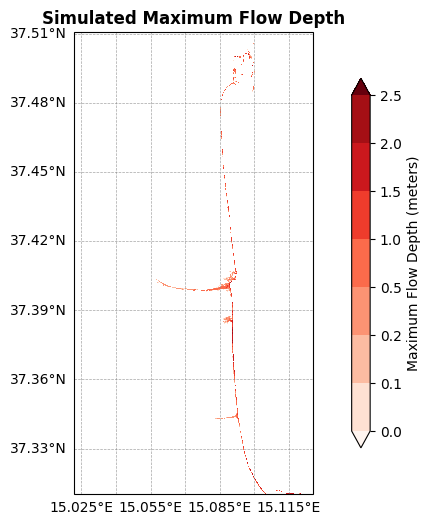

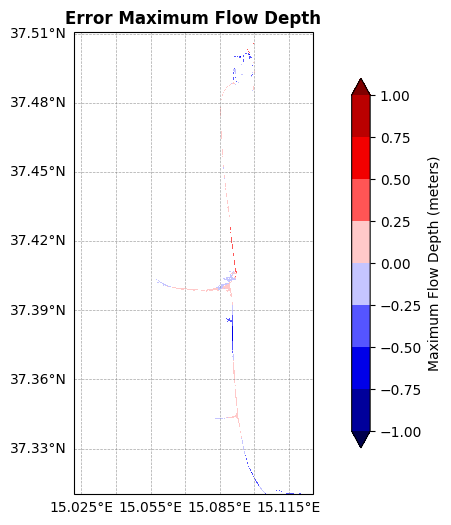

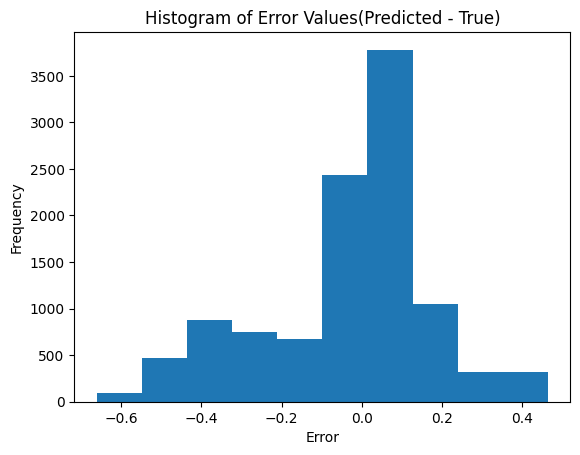

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from matplotlib import colors
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

##############PREDICTED######################

# Load the netCDF file
#file_path = "your_file.nc"  # Change to your actual file path
dataset = nc.Dataset(file_path_pred)

# Extract variables
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
predicted = dataset.variables['predicted'][:]

#set 0 to nan 
predicted = np.where(predicted <= 0, np.nan, predicted)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot predicted values as a heatmap
cmap = cm.get_cmap('Reds')
bounds = [0, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, predicted, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Predicted Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()


##################TRUE######################
# Load the netCDF file
#file_path = "your_file.nc"  # Change to your actual file path
dataset = nc.Dataset(file_path_true)

# Extract variables
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
true = dataset.variables['z'][:]

#set 0 to nan 
true = np.where(true <= 0, np.nan, true)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot true values as a heatmap
cmap = cm.get_cmap('Reds')
bounds = [0, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, true, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Simulated Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()

###################ERROR######################

error = predicted - true

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot error values as a heatmap
cmap = cm.get_cmap('seismic')
# bounds = [ -1.5,-1, -0.5, -0.25,0,0.25, 0.5, 1, 1.5]
bounds = [-1,-0.75, -0.5, -.25, 0, .25, .5, .75,1]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, error, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Error Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()

#set nan to 0 in error
error_flat = error.flatten()
error_non_nan = error_flat[~np.isnan(error_flat)]
plt.hist(error_non_nan, bins=10)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Histogram of Error Values(Predicted - True)")
plt.show()

PTF Run from Manuela(INGV)

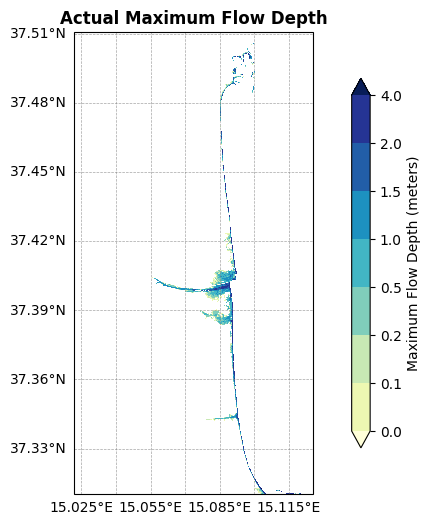

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from matplotlib import colors
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

# Load the netCDF file
file_path = "/home/nrr/NGI/P/2022/02/20220296/Calculations/from_Leonardo/20250513/direct_simulation/scenario_62158/grid3-catania_flowdepht.nc"  # Change to your actual file path
dataset = nc.Dataset(file_path)

# Extract variables
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
predicted = dataset.variables['z'][:]

#set 0 to nan 
true = np.where(predicted <= 0, np.nan, predicted)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot predicted values as a heatmap
cmap = cm.get_cmap('YlGnBu')
bounds = [0, 0.1, 0.2, 0.5, 1, 1.5, 2, 4]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, true, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Actual Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()

PTF Simulated Ensemble

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import pandas as pd

# Load the netCDF file
# folder_path = "/home/nrr/NGI/P/2022/02/20220296/Calculations/from_Leonardo/20250512/data" #loop through all scenario files like PS_Scenario000001_CT_10m.nc ending with _CT_10m.nc and compile a single netcdf with z values and their statistics at each lat/lon
folder_path = "/home/nrr/projects/inundation-emulator/tests/data" #loop through all scenario files like PS_Scenario000001_CT_10m.nc ending with _CT_10m.nc and compile a single netcdf with z values and their statistics at each lat/lon
files = [f for f in os.listdir(folder_path) if f.endswith('_CT_10m.nc')]
#sort files
files.sort()
topo_mask = '/home/nrr/projects/inundation-emulator/generated/emulator_20250406_124935/topomask.npy'
#load topomask
topomask = np.load(topo_mask)

#create empty arrays to store lat, lon, and z values, and append per scenario z
z_all = []

for file_path in files[:]:

    print(f"\rProcessing: {file_path}", end="", flush=True)


    full_path = os.path.join(folder_path, file_path)

    # Load the netCDF file
    dataset = nc.Dataset(full_path)

    # Extract variables
    if file_path == 'PS_Scenario000001_CT_10m.nc':
        #arrange lat and lon like z array
        lat = dataset.variables['lat'][:]
        lon = dataset.variables['lon'][:]
        lon2d, lat2d = np.meshgrid(lon, lat)
        lon_mask = lon2d[topomask]
        lat_mask = lat2d[topomask]

    z = dataset.variables['z'][:]
    # Close the dataset
    dataset.close()

    #append z values to z_all
    z_all.append(z[topomask])

# Convert list to NumPy array (shape: [n_scenarios, n_masked_points])
z_all = np.array(z_all)
#replace nan with 0
z_all = np.nan_to_num(z_all, nan=0.0)

#get some statistics like 0.5, 0.16, mean(0.5), 0.84, 0.95
quantiles = [0.01,0.05, 0.16, 0.5, 0.84, 0.95,0.99]

zQuantiles = np.quantile(z_all, quantiles, axis=0)


Processing: PS_Scenario001066_CT_10m.nc

In [7]:
#save to csv
table = pd.DataFrame(list(zip(lon_mask, lat_mask, *zQuantiles)))
table.columns = ['lon', 'lat'] + [f'q{int(q*100)}' for q in quantiles]
table.to_csv('/home/nrr/projects/inundation-emulator/generated/predictions/emulator_20250516_073408/preds_20250516_142559/z_quantiles.csv', index=False)


PTF Emulation Ensemble

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import pandas as pd

# Load the netCDF file
folder_path = "/home/nrr/projects/inundation-emulator/generated/predictions/emulator_20250516_073408/preds_20250516_142559" #loop through all scenario files like PS_Scenario000001_CT_10m.nc ending with _CT_10m.nc and compile a single netcdf with z values and their statistics at each lat/lon
files = [f for f in os.listdir(folder_path) if f.endswith('_CT_10m_PR.nc')]
#sort files
files.sort()

topo_mask = '/home/nrr/projects/inundation-emulator/generated/emulator_20250406_124935/topomask.npy'
#load topomask
topomask = np.load(topo_mask)

#create empty arrays to store lat, lon, and z values, and append per scenario z
zhat_all = []

for file_path in files[:]:

    print(f"\rProcessing: {file_path}", end="", flush=True)


    full_path = os.path.join(folder_path, file_path)

    # Load the netCDF file
    dataset = nc.Dataset(full_path)

    # Extract variables
    if file_path == 'PS_Scenario000001_CT_10m.nc':
        #arrange lat and lon like z array
        lat = dataset.variables['lat'][:]
        lon = dataset.variables['lon'][:]
        lon2d, lat2d = np.meshgrid(lon, lat)
        lon_mask = lon2d[topomask]
        lat_mask = lat2d[topomask]

    zhat = dataset.variables['predicted'][:]
    # Close the dataset
    dataset.close()

    #append z values to zhat_all
    zhat_all.append(zhat[topomask])

# Convert list to NumPy array (shape: [n_scenarios, n_masked_points])
zhat_all = np.array(zhat_all)
#replace nan with 0
zhat_all = np.nan_to_num(zhat_all, nan=0.0)

#get some statistics like 0.5, 0.16, mean(0.5), 0.84, 0.95
quantiles = [0.01,0.05, 0.16, 0.5, 0.84, 0.95,0.99]

zhatQuantiles = np.quantile(zhat_all, quantiles, axis=0)


Processing: PS_Scenario000001_CT_10m_PR.nc

Processing: PS_Scenario001066_CT_10m_PR.nc

In [10]:
#save to csv
table = pd.DataFrame(list(zip(lon_mask, lat_mask, *zhatQuantiles)))
table.columns = ['lon', 'lat'] + [f'q{int(q*100)}' for q in quantiles]
table.to_csv('/home/nrr/projects/inundation-emulator/generated/predictions/emulator_20250516_073408/preds_20250516_142559/zhat_quantiles.csv', index=False)


In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colormaps
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

i = 0  # Index of the event to plot
print(f"plotting event: {[i]}", end="", flush=True)

# Define shared coordinates
z_sim = z_all[i]
z_emul = zhat_all[i]
error = z_emul - z_sim  # Error map

# Setup figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Common flow depth colormap and normalization
depth_cmap = colormaps['YlGnBu']
depth_bounds = [0.001, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5]
depth_norm = colors.BoundaryNorm(depth_bounds, depth_cmap.N, extend='both')

# --- Plot 1: Simulated ---
sc0 = axs[0].scatter(lon_mask, lat_mask, c=z_sim, cmap=depth_cmap, norm=depth_norm, s=0.01, transform=ccrs.PlateCarree())
axs[0].set_title(f"Simulated Flow Depth", fontsize=12, fontweight="bold")
gl0 = axs[0].gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl0.top_labels = gl0.right_labels = False
gl0.xformatter = cticker.LongitudeFormatter()
gl0.yformatter = cticker.LatitudeFormatter()

# --- Plot 2: Emulated ---
sc1 = axs[1].scatter(lon_mask, lat_mask, c=z_emul, cmap=depth_cmap, norm=depth_norm, s=0.01, transform=ccrs.PlateCarree())
axs[1].set_title("Emulated Flow Depth", fontsize=12, fontweight="bold")
gl1 = axs[1].gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl1.top_labels = gl1.right_labels = False
gl1.xformatter = cticker.LongitudeFormatter()
gl1.yformatter = cticker.LatitudeFormatter()

# --- Plot 3: Error ---
error_cmap = colormaps['RdYlBu']
error_bounds = [-1, -0.75, -0.5, -0.25, -0.05, 0, 0.05, 0.25, 0.5, 0.75, 1]
error_norm = colors.BoundaryNorm(error_bounds, error_cmap.N, extend='both')

# Reshape error if needed (depends on shape of lat/lon)
sc2 = axs[2].scatter(lon_mask, lat_mask, c=error, cmap=error_cmap, norm=error_norm, s=0.01, transform=ccrs.PlateCarree())
axs[2].set_title("Error (Emulated - Simulated)", fontsize=12, fontweight="bold")
gl2 = axs[2].gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl2.top_labels = gl2.right_labels = False
gl2.xformatter = cticker.LongitudeFormatter()
gl2.yformatter = cticker.LatitudeFormatter()

# --- Colorbars ---
# Depth (m) colorbar on the left of first subplot
cbar_ax1 = fig.add_axes([0.02, 0.25, 0.015, 0.5])  
cbar1 = fig.colorbar(sc1, cax=cbar_ax1)
cbar1.set_label('Depth (m)')
cbar1.ax.yaxis.set_label_position('left')
cbar1.ax.yaxis.set_ticks_position('left')

# Error (m) colorbar on the right of last subplot
cbar_ax2 = fig.add_axes([0.91, 0.25, 0.015, 0.5])
cbar2 = fig.colorbar(sc2, cax=cbar_ax2)
cbar2.set_label('Error (m)')
plt.suptitle(f"{files[i][3:-13]}", fontsize=14, fontweight="bold")
plt.show()

#plot for error atleast +-1cm
fig, ax = plt.subplots(figsize=(6, 6))
error_filter = error[np.abs(error) >= 0.01]
plt.hist(error_filter, bins=10)
plt.xlim(-1, 1)
plt.xticks(np.arange(-1, 1, 0.2))
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Histogram of Error Values(Predicted - True)", fontsize=14, fontweight="bold")
plt.show()

plotting event: [0]

NameError: name 'z_all' is not defined

Plot for thresholds

plotting for Q:0.01

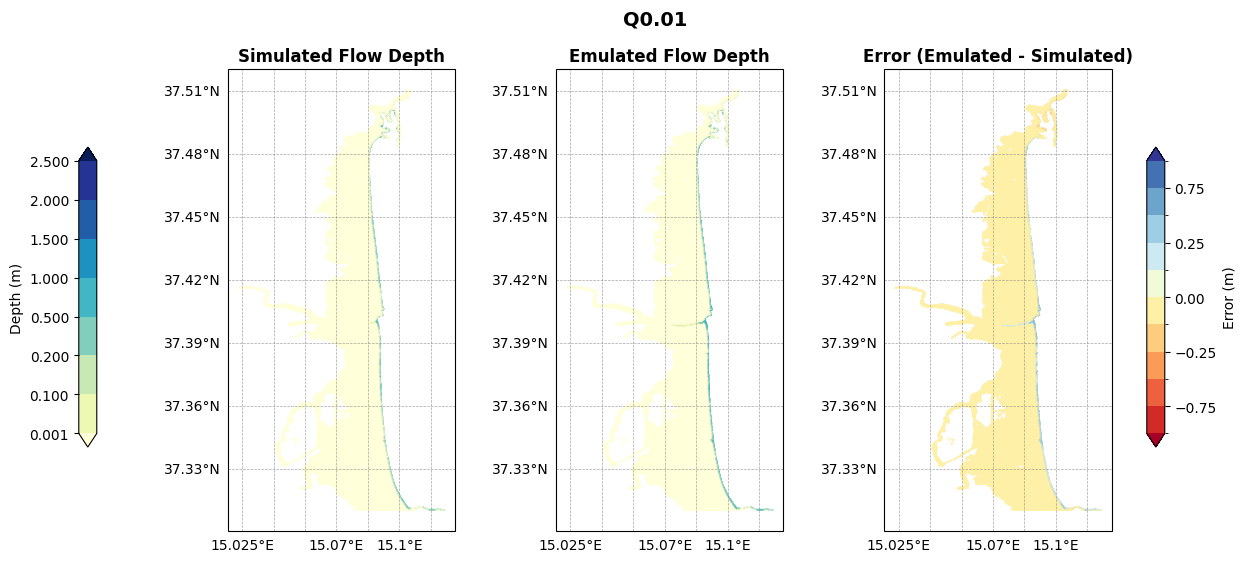

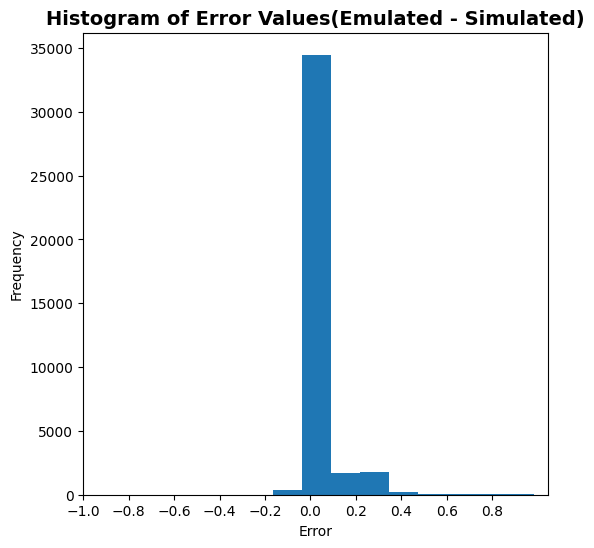

plotting for Q:0.05

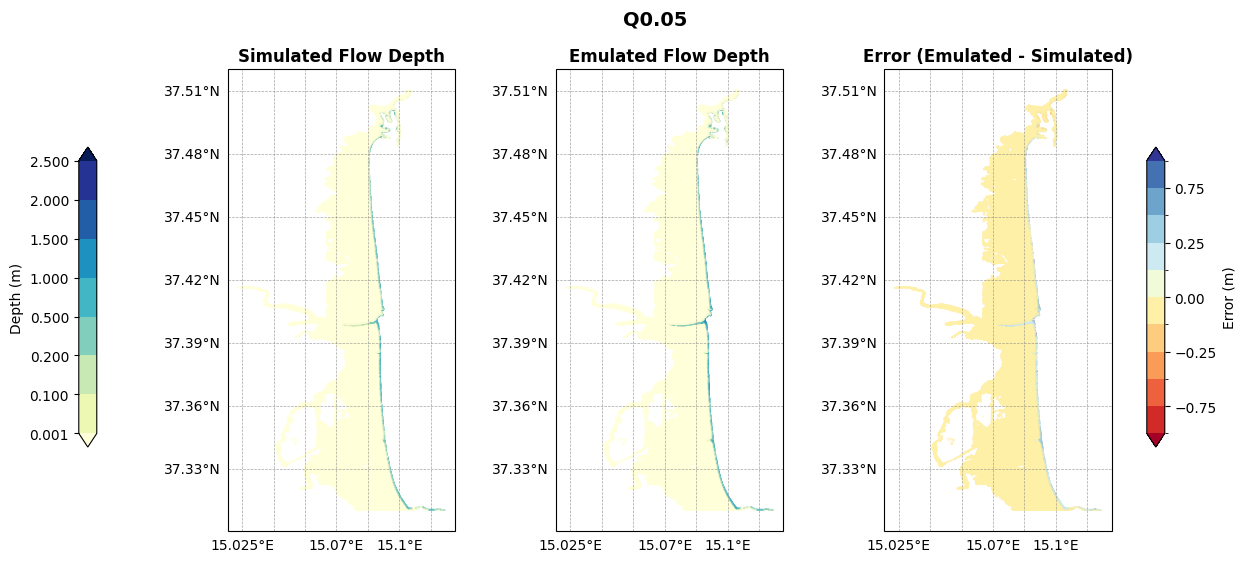

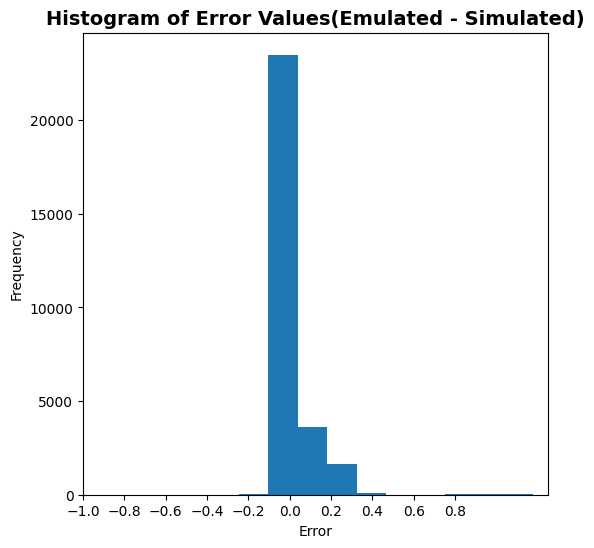

plotting for Q:0.16

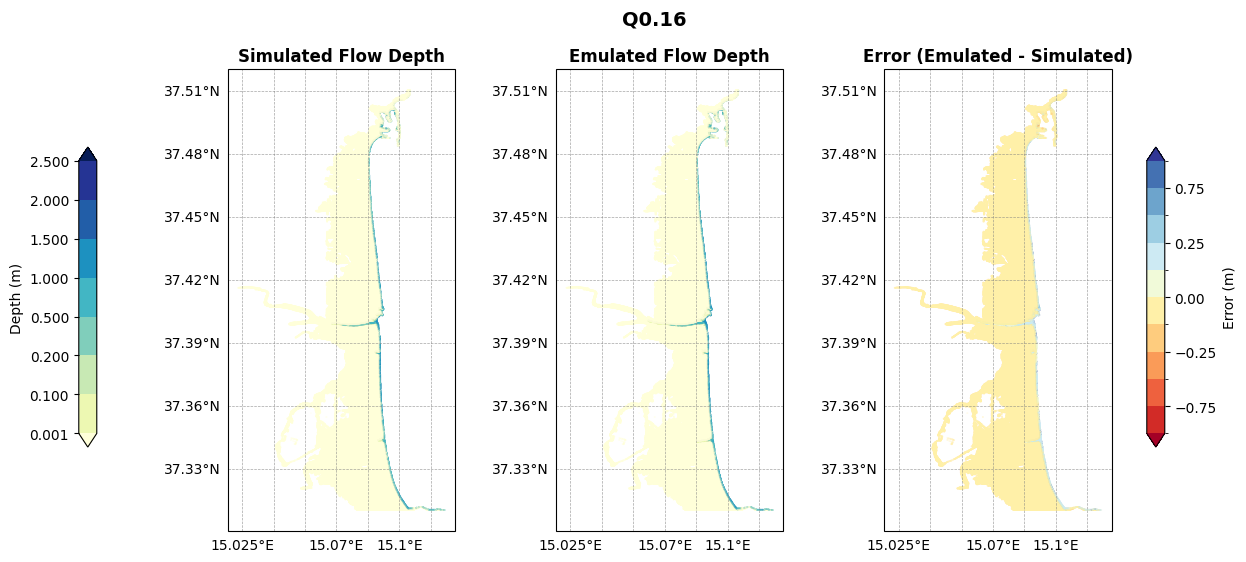

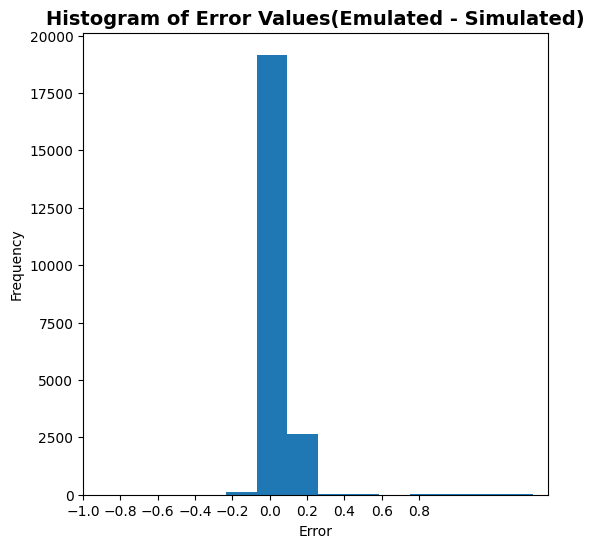

plotting for Q:0.5

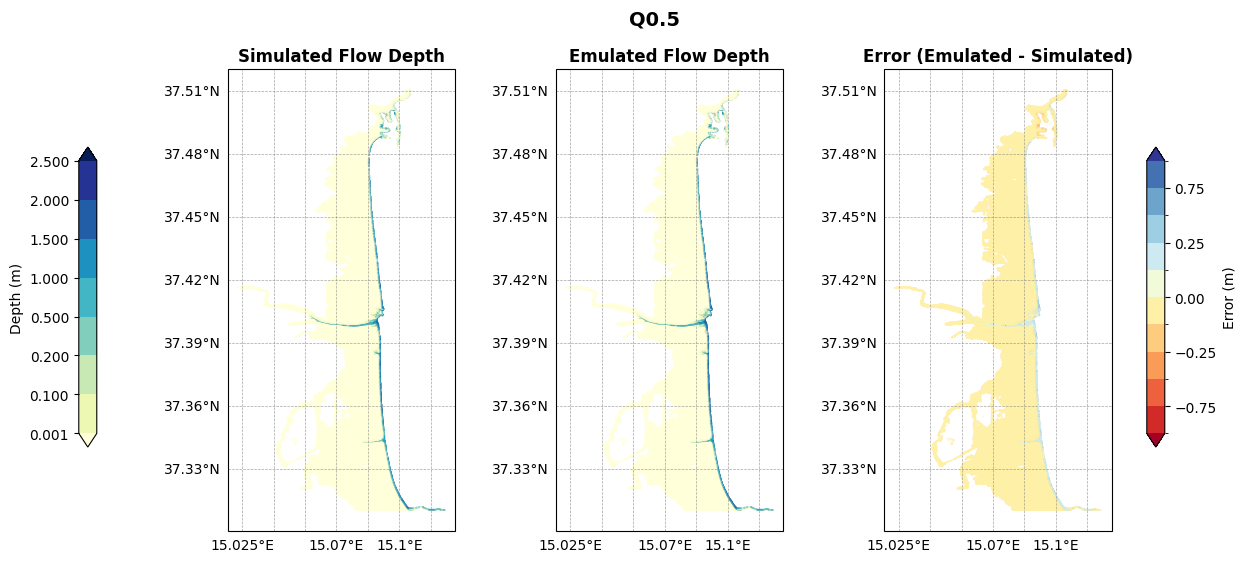

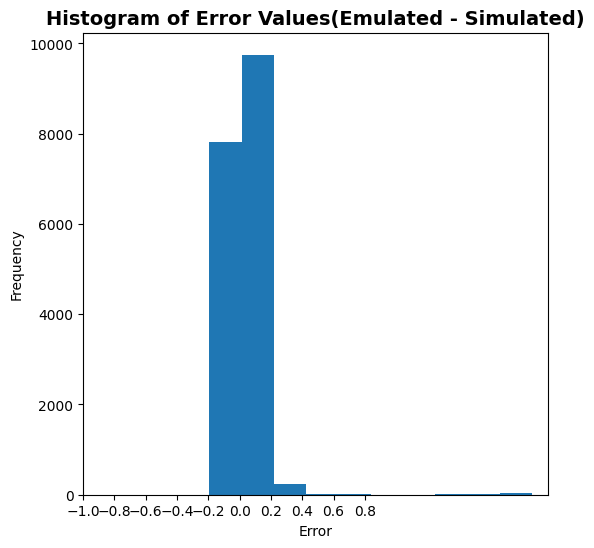

plotting for Q:0.84

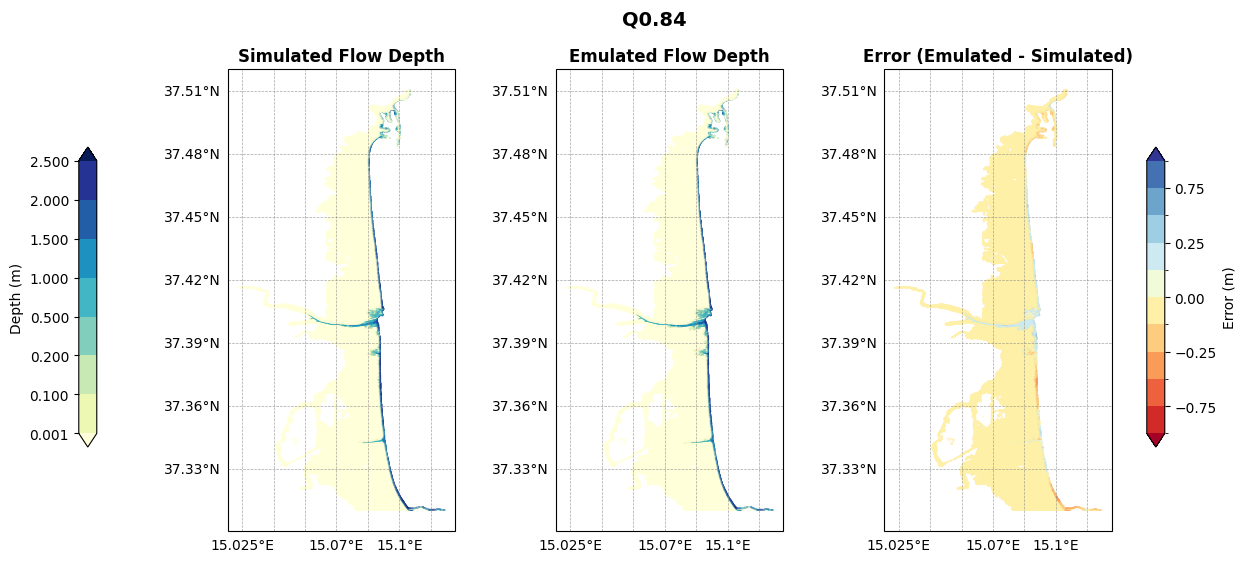

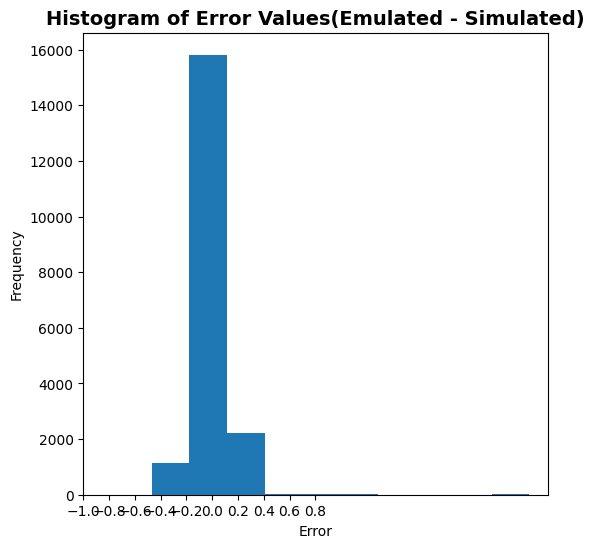

plotting for Q:0.95

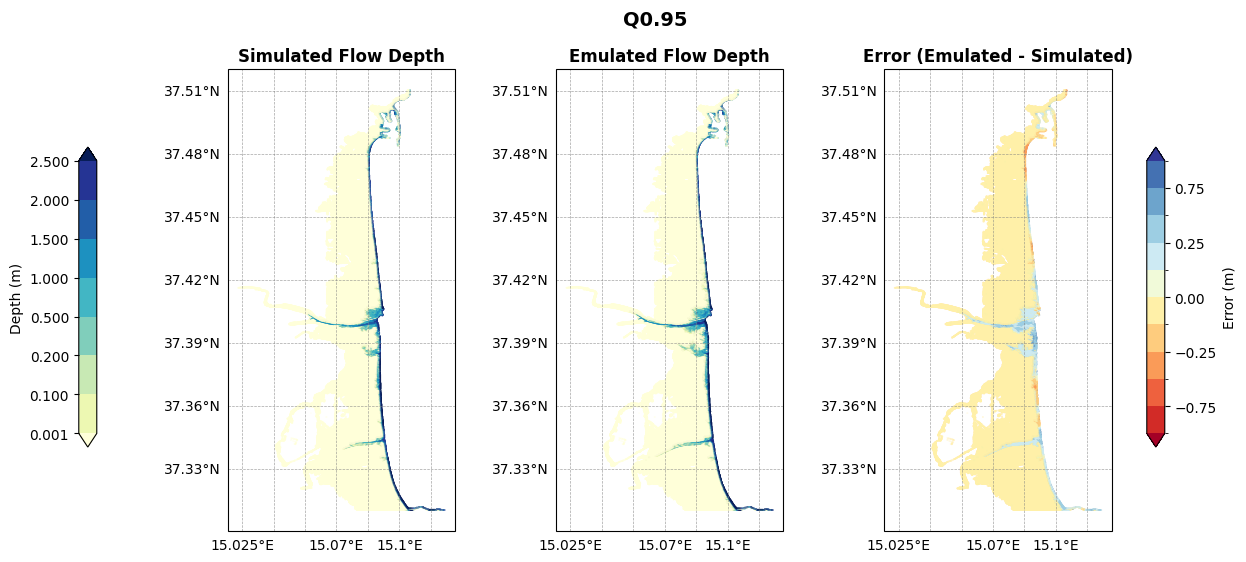

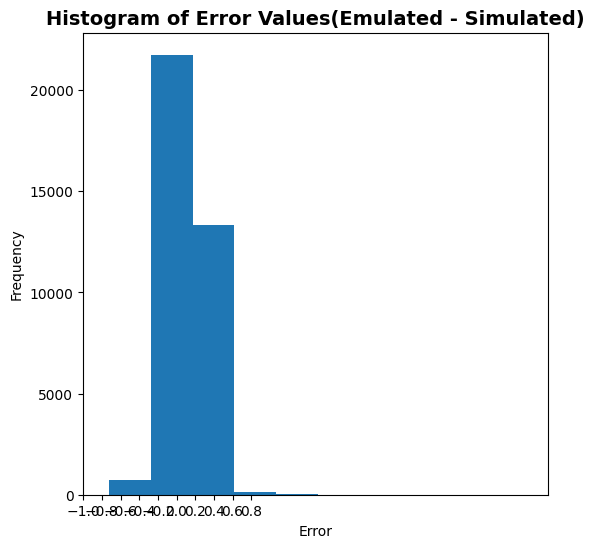

plotting for Q:0.99

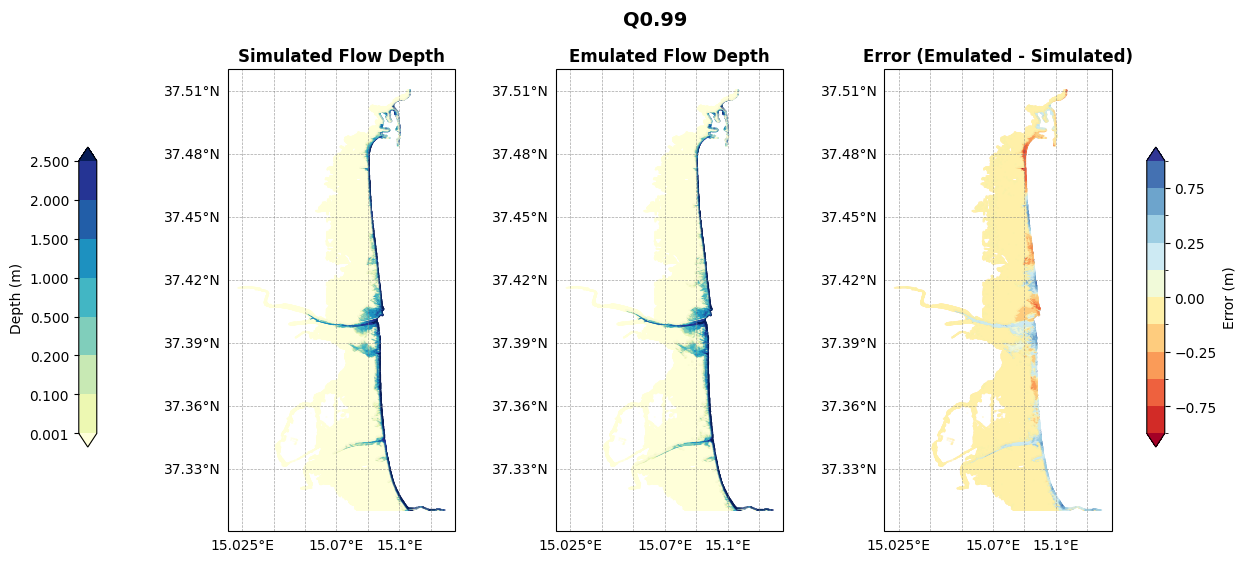

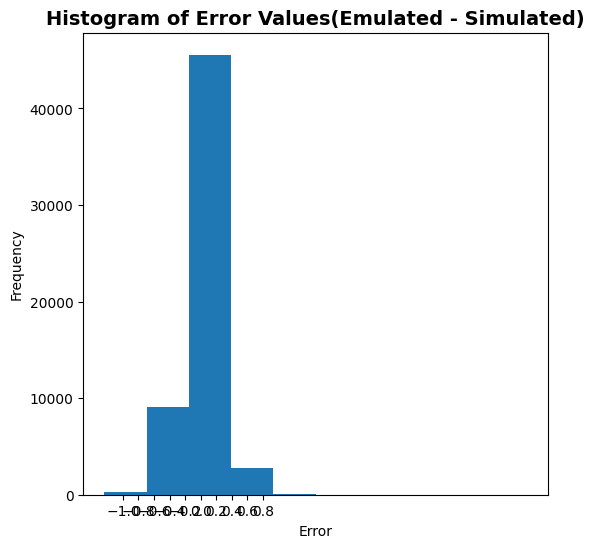

In [40]:
#plot the lat, lon, and z values as map
depth_cmap = colormaps['YlGnBu']
bounds = [0.001, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')

error_cmap = colormaps['RdYlBu']
error_bounds = [-1, -0.75, -0.5, -0.25, -0.05, 0, 0.05, 0.25, 0.5, 0.75, 1]
error_norm = colors.BoundaryNorm(error_bounds, error_cmap.N, extend='both')

for i in range(len(zQuantiles)):
    print(f"plotting for Q:{quantiles[i]}", end="", flush=True)

    # Define shared coordinates
    z_sim = zQuantiles[i]
    z_emul = zhatQuantiles[i]
    error = z_emul - z_sim  # Error map

    # Setup figure and subplots
    fig, axs = plt.subplots(1, 3, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

    # --- Plot 1: Simulated ---
    sc0 = axs[0].scatter(lon_mask, lat_mask, c=z_sim, cmap=depth_cmap, norm=depth_norm, s=0.01, transform=ccrs.PlateCarree())
    axs[0].set_title(f"Simulated Flow Depth", fontsize=12, fontweight="bold")
    gl0 = axs[0].gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
    gl0.top_labels = gl0.right_labels = False
    gl0.xformatter = cticker.LongitudeFormatter()
    gl0.yformatter = cticker.LatitudeFormatter()

    # --- Plot 2: Emulated ---
    sc1 = axs[1].scatter(lon_mask, lat_mask, c=z_emul, cmap=depth_cmap, norm=depth_norm, s=0.01, transform=ccrs.PlateCarree())
    axs[1].set_title("Emulated Flow Depth", fontsize=12, fontweight="bold")
    gl1 = axs[1].gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
    gl1.top_labels = gl1.right_labels = False
    gl1.xformatter = cticker.LongitudeFormatter()
    gl1.yformatter = cticker.LatitudeFormatter()

    # --- Plot 3: Error ---
    sc2 = axs[2].scatter(lon_mask, lat_mask, c=error, cmap=error_cmap, norm=error_norm, s=0.01, transform=ccrs.PlateCarree())
    axs[2].set_title("Error (Emulated - Simulated)", fontsize=12, fontweight="bold")
    gl2 = axs[2].gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
    gl2.top_labels = gl2.right_labels = False
    gl2.xformatter = cticker.LongitudeFormatter()
    gl2.yformatter = cticker.LatitudeFormatter()

    # --- Colorbars ---
    # Depth (m) colorbar on the left of first subplot
    cbar_ax1 = fig.add_axes([0.02, 0.25, 0.015, 0.5])  
    cbar1 = fig.colorbar(sc1, cax=cbar_ax1)
    cbar1.set_label('Depth (m)')
    cbar1.ax.yaxis.set_label_position('left')
    cbar1.ax.yaxis.set_ticks_position('left')

    # Error (m) colorbar on the right of last subplot
    cbar_ax2 = fig.add_axes([0.91, 0.25, 0.015, 0.5])
    cbar2 = fig.colorbar(sc2, cax=cbar_ax2)
    cbar2.set_label('Error (m)')

    plt.suptitle(f"Q{quantiles[i]}", fontsize=14, fontweight="bold")
    plt.show()


    #plot for error atleast +-1cm
    fig, ax = plt.subplots(figsize=(6, 6))
    error_filter = error[np.abs(error) >= 0.01]
    plt.hist(error_filter, bins=10)
    plt.xticks(np.arange(-1, 1, 0.2))
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.title("Histogram of Error Values(Emulated - Simulated)", fontsize=14, fontweight="bold")
    plt.show()